In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import get_data_loaders, train, test
from PIL import Image
import pandas as pd

In [2]:
root = './distilled_dataset'

### CIFAR10 Distilled

In [3]:
class CIFAR10_Distilled(Dataset):
    def __init__(self, idx_df, transform):
        self.idx_df = idx_df
        self.transform = transform
    
    def __len__(self):
        return len(self.idx_df)

    def __getitem__(self, index):
        entry = self.idx_df.iloc[index]
        image = self.transform(Image.open(entry.image_path))
        label = entry.label
        return image, torch.tensor(label)

In [4]:
index_file = pd.read_csv('./CIFAR10_DM_index_files/ipc500_idx.csv')
index_file

,image_path,label
0,./CIFAR10_DM/ipc500/airplane/003746e7-c915-4d7...,0
1,./CIFAR10_DM/ipc500/airplane/0090a052-69a0-461...,0
2,./CIFAR10_DM/ipc500/airplane/0143960d-3978-448...,0
3,./CIFAR10_DM/ipc500/airplane/01ee79d8-a8fe-430...,0
4,./CIFAR10_DM/ipc500/airplane/0231edfd-42fd-477...,0
...,...,...
4995,./CIFAR10_DM/ipc500/truck/fb1fbeaf-b6c7-4da4-a...,9
4996,./CIFAR10_DM/ipc500/truck/fcd9e0b0-9b62-4d41-8...,9
4997,./CIFAR10_DM/ipc500/truck/fdefdd6d-2fd9-42f1-b...,9
4998,./CIFAR10_DM/ipc500/truck/ff83d309-da9a-459a-a...,9


In [5]:
image_normalize= transforms.Lambda(lambda img: 2 * img / 255. - 1) # normalize to [-1, 1]
# https://github.com/Lornatang/pytorch-alexnet-cifar100/blob/master/utils/datasets.py
transform = transforms.Compose([
                                transforms.Resize(128),
                                # transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                # image_normalize,
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                              ])
cifar10_distilled_train = CIFAR10_Distilled(index_file, transform)

cifar10_root = '../cifar10'
cifar10_test = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                transforms.Resize(128),
                                                transforms.ToTensor(),
                                                # image_normalize,
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [6]:
batch_size = 16 # cut batch size to half for ipc50
train_data_loader, test_data_loader = get_data_loaders(cifar10_distilled_train, cifar10_test, batch_size=batch_size)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [8]:
model_name = 'alexnet'
dataset = 'cifar10_distilled'
model_path = f'./model_weight/{dataset}/{model_name}/'
model = torchvision.models.alexnet(num_classes=10).to(device)

In [9]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

c:\Users\Andrew\envs\CS5340\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Epoch 1: 100%|██████████| 313/313 [00:14<00:00, 20.92it/s, loss=2.29]


epoch: 1 done, loss: 0.14407068490982056
Acc: 0.1001
[0.001]


Epoch 2: 100%|██████████| 313/313 [00:09<00:00, 32.12it/s, loss=2.25]


epoch: 2 done, loss: 0.14190606772899628
Acc: 0.167
[0.001]


Epoch 3: 100%|██████████| 313/313 [00:10<00:00, 29.58it/s, loss=1.14] 


epoch: 3 done, loss: 0.10300103574991226
Acc: 0.2985
[0.001]


Epoch 4: 100%|██████████| 313/313 [00:09<00:00, 31.94it/s, loss=1.01] 


epoch: 4 done, loss: 0.07310181856155396
Acc: 0.3508
[0.001]


Epoch 5: 100%|██████████| 313/313 [00:10<00:00, 30.31it/s, loss=0.708]


epoch: 5 done, loss: 0.05949185788631439
Acc: 0.3587
[0.001]


Epoch 6: 100%|██████████| 313/313 [00:11<00:00, 28.02it/s, loss=0.511]


epoch: 6 done, loss: 0.04683380946516991
Acc: 0.4217
[0.001]


Epoch 7: 100%|██████████| 313/313 [00:12<00:00, 25.19it/s, loss=0.887]


epoch: 7 done, loss: 0.03713636100292206
Acc: 0.4359
[0.001]


Epoch 8: 100%|██████████| 313/313 [00:14<00:00, 21.72it/s, loss=0.243] 


epoch: 8 done, loss: 0.028779570013284683
Acc: 0.4541
[0.001]


Epoch 9: 100%|██████████| 313/313 [00:14<00:00, 21.19it/s, loss=0.527] 


epoch: 9 done, loss: 0.023357180878520012
Acc: 0.4491
[0.001]


Epoch 10: 100%|██████████| 313/313 [00:14<00:00, 22.06it/s, loss=0.188] 


epoch: 10 done, loss: 0.0198894701898098
Acc: 0.4939
[0.001]


Epoch 11: 100%|██████████| 313/313 [00:14<00:00, 21.69it/s, loss=0.0894]


epoch: 11 done, loss: 0.01786247454583645
Acc: 0.497
[0.001]


Epoch 12: 100%|██████████| 313/313 [00:14<00:00, 20.89it/s, loss=0.139]  


epoch: 12 done, loss: 0.015190180391073227
Acc: 0.4981
[0.001]


Epoch 13: 100%|██████████| 313/313 [00:14<00:00, 21.49it/s, loss=0.332]  


epoch: 13 done, loss: 0.014403769746422768
Acc: 0.5003
[0.001]


Epoch 14: 100%|██████████| 313/313 [00:14<00:00, 21.89it/s, loss=0.133]  


epoch: 14 done, loss: 0.011056005023419857
Acc: 0.5222
[0.001]


Epoch 15: 100%|██████████| 313/313 [00:14<00:00, 21.21it/s, loss=0.199]  


epoch: 15 done, loss: 0.00882850680500269
Acc: 0.4702
[0.001]


Epoch 16: 100%|██████████| 313/313 [00:14<00:00, 22.05it/s, loss=0.0274] 


epoch: 16 done, loss: 0.009292776696383953
Acc: 0.5038
[0.001]


Epoch 17: 100%|██████████| 313/313 [00:15<00:00, 20.43it/s, loss=0.563]  


epoch: 17 done, loss: 0.007553832605481148
Acc: 0.5356
[0.001]


Epoch 18: 100%|██████████| 313/313 [00:15<00:00, 20.41it/s, loss=0.02]   


epoch: 18 done, loss: 0.006432761903852224
Acc: 0.5293
[0.001]


Epoch 19: 100%|██████████| 313/313 [00:14<00:00, 21.51it/s, loss=0.0185]  


epoch: 19 done, loss: 0.00512555381283164
Acc: 0.5058
[0.001]


Epoch 20: 100%|██████████| 313/313 [00:14<00:00, 21.76it/s, loss=0.0869]  


epoch: 20 done, loss: 0.004966039210557938
Acc: 0.5127
[0.001]


Epoch 21: 100%|██████████| 313/313 [00:14<00:00, 22.18it/s, loss=0.0104]  


epoch: 21 done, loss: 0.0037670214660465717
Acc: 0.5288
[0.001]


Epoch 22: 100%|██████████| 313/313 [00:14<00:00, 22.02it/s, loss=0.00885] 


epoch: 22 done, loss: 0.0031216060742735863
Acc: 0.547
[0.001]


Epoch 23: 100%|██████████| 313/313 [00:14<00:00, 22.00it/s, loss=0.00263] 


epoch: 23 done, loss: 0.002786545781418681
Acc: 0.5491
[0.001]


Epoch 24: 100%|██████████| 313/313 [00:15<00:00, 20.84it/s, loss=0.877]   


epoch: 24 done, loss: 0.002772741252556443
Acc: 0.5433
[0.001]


Epoch 25: 100%|██████████| 313/313 [00:14<00:00, 21.54it/s, loss=0.00167] 


epoch: 25 done, loss: 0.0034613988827914
Acc: 0.5679
[0.001]


Epoch 26: 100%|██████████| 313/313 [00:14<00:00, 21.19it/s, loss=0.0022]  


epoch: 26 done, loss: 0.0019038701429963112
Acc: 0.5391
[0.001]


Epoch 27: 100%|██████████| 313/313 [00:14<00:00, 21.57it/s, loss=0.00117] 


epoch: 27 done, loss: 0.0020647882483899593
Acc: 0.5411
[0.001]


Epoch 28: 100%|██████████| 313/313 [00:14<00:00, 20.88it/s, loss=2.69e-5] 


epoch: 28 done, loss: 0.0018505643820390105
Acc: 0.5457
[0.001]


Epoch 29: 100%|██████████| 313/313 [00:14<00:00, 21.52it/s, loss=0.0186]  


epoch: 29 done, loss: 0.0017777185421437025
Acc: 0.5458
[0.001]


Epoch 30: 100%|██████████| 313/313 [00:14<00:00, 21.62it/s, loss=0.00184] 


epoch: 30 done, loss: 0.0013408127706497908
Acc: 0.5526
[0.001]


Epoch 31: 100%|██████████| 313/313 [00:14<00:00, 21.62it/s, loss=0.0183]  


epoch: 31 done, loss: 0.001101888483390212
Acc: 0.5584
[0.001]


Epoch 32: 100%|██████████| 313/313 [00:14<00:00, 21.68it/s, loss=4.83e-6] 


epoch: 32 done, loss: 0.0004217768437229097
Acc: 0.5678
[0.001]


Epoch 33: 100%|██████████| 313/313 [00:14<00:00, 21.76it/s, loss=0.00522] 


epoch: 33 done, loss: 0.00215267320163548
Acc: 0.5286
[0.001]


Epoch 34: 100%|██████████| 313/313 [00:14<00:00, 21.95it/s, loss=0.00171] 


epoch: 34 done, loss: 0.0020015821792185307
Acc: 0.5435
[0.001]


Epoch 35: 100%|██████████| 313/313 [00:14<00:00, 21.53it/s, loss=0.00248] 


epoch: 35 done, loss: 0.0012724188854917884
Acc: 0.5535
[0.001]


Epoch 36: 100%|██████████| 313/313 [00:14<00:00, 21.20it/s, loss=3.96e-6] 


epoch: 36 done, loss: 0.00019767611229326576
Acc: 0.5623
[0.001]


Epoch 37: 100%|██████████| 313/313 [00:14<00:00, 21.18it/s, loss=9.67e-5] 


epoch: 37 done, loss: 0.00018142738554161042
Acc: 0.5528
[0.001]


Epoch 38: 100%|██████████| 313/313 [00:14<00:00, 21.27it/s, loss=0.000423]


epoch: 38 done, loss: 0.0006843865849077702
Acc: 0.5607
[0.001]


Epoch 39: 100%|██████████| 313/313 [00:14<00:00, 22.11it/s, loss=9.26e-5] 


epoch: 39 done, loss: 0.0008371968287974596
Acc: 0.5636
[0.001]


Epoch 40: 100%|██████████| 313/313 [00:14<00:00, 21.56it/s, loss=1.56e-5] 


epoch: 40 done, loss: 0.00017400877550244331
Acc: 0.5632
[0.001]


Epoch 41: 100%|██████████| 313/313 [00:14<00:00, 21.28it/s, loss=9.28e-5] 


epoch: 41 done, loss: 4.538888606475666e-05
Acc: 0.57
[0.001]


Epoch 42: 100%|██████████| 313/313 [00:14<00:00, 21.68it/s, loss=3.94e-5] 


epoch: 42 done, loss: 0.0003732469631358981
Acc: 0.546
[0.001]


Epoch 43: 100%|██████████| 313/313 [00:14<00:00, 21.01it/s, loss=6.73e-5] 


epoch: 43 done, loss: 0.00016741020954214036
Acc: 0.5669
[0.001]


Epoch 44: 100%|██████████| 313/313 [00:14<00:00, 21.64it/s, loss=2.52e-5] 


epoch: 44 done, loss: 4.142192847211845e-05
Acc: 0.5653
[0.001]


Epoch 45: 100%|██████████| 313/313 [00:14<00:00, 21.04it/s, loss=0.0183]  


epoch: 45 done, loss: 0.0015842587454244494
Acc: 0.5283
[0.001]


Epoch 46: 100%|██████████| 313/313 [00:14<00:00, 21.46it/s, loss=0.0117]  


epoch: 46 done, loss: 0.0012744276318699121
Acc: 0.5341
[0.001]


Epoch 47: 100%|██████████| 313/313 [00:14<00:00, 22.04it/s, loss=0.0273]  


epoch: 47 done, loss: 0.0035609763581305742
Acc: 0.5645
[0.001]


Epoch 48: 100%|██████████| 313/313 [00:14<00:00, 21.80it/s, loss=0.000862]


epoch: 48 done, loss: 0.0002827180433087051
Acc: 0.5625
[0.0001]


Epoch 49: 100%|██████████| 313/313 [00:14<00:00, 21.78it/s, loss=0.000139]


epoch: 49 done, loss: 0.00014214441762305796
Acc: 0.5658
[0.0001]


Epoch 50: 100%|██████████| 313/313 [00:14<00:00, 21.90it/s, loss=1.14e-5] 


epoch: 50 done, loss: 8.741240162635222e-05
Acc: 0.5687
[0.0001]


Epoch 51: 100%|██████████| 313/313 [00:14<00:00, 21.73it/s, loss=1.73e-5] 


epoch: 51 done, loss: 5.488746683113277e-05
Acc: 0.5684
[0.0001]


Epoch 52: 100%|██████████| 313/313 [00:14<00:00, 21.50it/s, loss=9.52e-6] 


epoch: 52 done, loss: 5.153443635208532e-05
Acc: 0.5683
[1e-05]


Epoch 53: 100%|██████████| 313/313 [00:14<00:00, 21.55it/s, loss=0.000328]


epoch: 53 done, loss: 4.588768206303939e-05
Acc: 0.5682
[1e-05]


Epoch 54: 100%|██████████| 313/313 [00:14<00:00, 21.48it/s, loss=0.000616]


epoch: 54 done, loss: 4.413497663335875e-05
Acc: 0.5682
[1e-05]


Epoch 55: 100%|██████████| 313/313 [00:14<00:00, 21.59it/s, loss=9.75e-5] 


epoch: 55 done, loss: 4.945376349496655e-05
Acc: 0.5686
[1e-05]


Epoch 56: 100%|██████████| 313/313 [00:13<00:00, 23.56it/s, loss=0.000201]


epoch: 56 done, loss: 4.920841456623748e-05
Acc: 0.5681
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 313/313 [00:14<00:00, 21.12it/s, loss=3.74e-5] 


epoch: 57 done, loss: 6.62007587379776e-05
Acc: 0.5681
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 313/313 [00:14<00:00, 21.81it/s, loss=0.00016] 


epoch: 58 done, loss: 7.526671834057197e-05
Acc: 0.5683
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 313/313 [00:14<00:00, 21.67it/s, loss=8.05e-7] 


epoch: 59 done, loss: 6.301216490101069e-05
Acc: 0.5684
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 313/313 [00:14<00:00, 21.19it/s, loss=0.000287]


epoch: 60 done, loss: 6.512260006275028e-05
Acc: 0.5684
[1.0000000000000002e-07]


Epoch 61: 100%|██████████| 313/313 [00:14<00:00, 21.59it/s, loss=0.000629]


epoch: 61 done, loss: 4.300010550650768e-05
Acc: 0.5684
[1.0000000000000002e-07]


Epoch 62: 100%|██████████| 313/313 [00:14<00:00, 21.30it/s, loss=2.62e-5] 


epoch: 62 done, loss: 5.242489351076074e-05
Acc: 0.5684
[1.0000000000000002e-07]


Epoch 63: 100%|██████████| 313/313 [00:14<00:00, 21.39it/s, loss=1.67e-6] 


epoch: 63 done, loss: 4.824647112400271e-05
Acc: 0.5684
[1.0000000000000002e-07]


Epoch 64: 100%|██████████| 313/313 [00:15<00:00, 20.68it/s, loss=0.00651] 


epoch: 64 done, loss: 4.1547766159055755e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 65: 100%|██████████| 313/313 [00:14<00:00, 21.77it/s, loss=0.00129] 


epoch: 65 done, loss: 4.537813947536051e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 66: 100%|██████████| 313/313 [00:15<00:00, 20.61it/s, loss=0.00247] 


epoch: 66 done, loss: 4.055110548506491e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 67: 100%|██████████| 313/313 [00:14<00:00, 21.30it/s, loss=1.13e-5] 


epoch: 67 done, loss: 5.221110404818319e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 68: 100%|██████████| 313/313 [00:14<00:00, 21.71it/s, loss=0.000129]


epoch: 68 done, loss: 5.118858825881034e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 69: 100%|██████████| 313/313 [00:14<00:00, 21.61it/s, loss=0.000116]


epoch: 69 done, loss: 4.94369633088354e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 70: 100%|██████████| 313/313 [00:14<00:00, 21.26it/s, loss=0.00104] 


epoch: 70 done, loss: 5.1068371249129996e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 71: 100%|██████████| 313/313 [00:14<00:00, 21.70it/s, loss=6.66e-5] 


epoch: 71 done, loss: 4.374466516310349e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 72: 100%|██████████| 313/313 [00:14<00:00, 21.34it/s, loss=0.00178] 


epoch: 72 done, loss: 5.174510442884639e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 73: 100%|██████████| 313/313 [00:14<00:00, 21.61it/s, loss=0.0011]  


epoch: 73 done, loss: 5.208381116972305e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 74: 100%|██████████| 313/313 [00:14<00:00, 21.97it/s, loss=0.00155] 


epoch: 74 done, loss: 4.670724956667982e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 75: 100%|██████████| 313/313 [00:14<00:00, 21.25it/s, loss=2.01e-6] 


epoch: 75 done, loss: 5.466169022838585e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 76: 100%|██████████| 313/313 [00:12<00:00, 25.55it/s, loss=6.17e-5] 


epoch: 76 done, loss: 4.6926503273425624e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 77: 100%|██████████| 313/313 [00:12<00:00, 24.57it/s, loss=7.03e-5] 


epoch: 77 done, loss: 5.046146907261573e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 78: 100%|██████████| 313/313 [00:12<00:00, 24.30it/s, loss=2.38e-7] 


epoch: 78 done, loss: 4.532968523562886e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 79: 100%|██████████| 313/313 [00:13<00:00, 23.20it/s, loss=8.2e-5]  


epoch: 79 done, loss: 4.412416819832288e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 80: 100%|██████████| 313/313 [00:12<00:00, 24.40it/s, loss=9.39e-7] 


epoch: 80 done, loss: 4.7266657929867506e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 81: 100%|██████████| 313/313 [00:12<00:00, 24.37it/s, loss=1.05e-5] 


epoch: 81 done, loss: 3.929100785171613e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 82: 100%|██████████| 313/313 [00:12<00:00, 24.69it/s, loss=0.000748]


epoch: 82 done, loss: 5.251942275208421e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 83: 100%|██████████| 313/313 [00:12<00:00, 24.54it/s, loss=2.04e-5] 


epoch: 83 done, loss: 5.447299190564081e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 84: 100%|██████████| 313/313 [00:12<00:00, 24.30it/s, loss=8.48e-6] 


epoch: 84 done, loss: 4.985354462405667e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 85: 100%|██████████| 313/313 [00:12<00:00, 24.60it/s, loss=4.59e-5] 


epoch: 85 done, loss: 4.645704757422209e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 86: 100%|██████████| 313/313 [00:12<00:00, 24.94it/s, loss=4.43e-5] 


epoch: 86 done, loss: 4.4280408474151045e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 87: 100%|██████████| 313/313 [00:13<00:00, 24.03it/s, loss=3.64e-5] 


epoch: 87 done, loss: 4.665872984332964e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 88: 100%|██████████| 313/313 [00:12<00:00, 24.48it/s, loss=2.7e-6]  


epoch: 88 done, loss: 5.504843284143135e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 89: 100%|██████████| 313/313 [00:13<00:00, 24.02it/s, loss=3.02e-5] 


epoch: 89 done, loss: 5.093295476399362e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 90: 100%|██████████| 313/313 [00:12<00:00, 24.64it/s, loss=0.00036] 


epoch: 90 done, loss: 6.681506056338549e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 91: 100%|██████████| 313/313 [00:12<00:00, 24.38it/s, loss=0.00035] 


epoch: 91 done, loss: 5.111473728902638e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 92: 100%|██████████| 313/313 [00:12<00:00, 24.74it/s, loss=4.41e-6] 


epoch: 92 done, loss: 4.987445936421864e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 93: 100%|██████████| 313/313 [00:12<00:00, 24.29it/s, loss=0.00209] 


epoch: 93 done, loss: 4.624430584954098e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 94: 100%|██████████| 313/313 [00:12<00:00, 24.49it/s, loss=0.000481]


epoch: 94 done, loss: 4.9008438509190455e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 95: 100%|██████████| 313/313 [00:13<00:00, 23.89it/s, loss=6.42e-6] 


epoch: 95 done, loss: 4.052833901369013e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 96: 100%|██████████| 313/313 [00:12<00:00, 24.58it/s, loss=0.000308]


epoch: 96 done, loss: 4.669534246204421e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 97: 100%|██████████| 313/313 [00:13<00:00, 24.05it/s, loss=0.00025] 


epoch: 97 done, loss: 4.178420203970745e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 98: 100%|██████████| 313/313 [00:12<00:00, 24.47it/s, loss=0.000183]


epoch: 98 done, loss: 5.56721024622675e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 99: 100%|██████████| 313/313 [00:12<00:00, 24.26it/s, loss=7.19e-5] 


epoch: 99 done, loss: 4.531221929937601e-05
Acc: 0.5684
[1.0000000000000004e-08]


Epoch 100: 100%|██████████| 313/313 [00:12<00:00, 24.09it/s, loss=3.96e-5] 


epoch: 100 done, loss: 5.696379957953468e-05
Acc: 0.5684
[1.0000000000000004e-08]
Time taken: 2955.602572 seconds


In [10]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.57, tensor(0.2160, device='cuda:0'))

<AxesSubplot: >

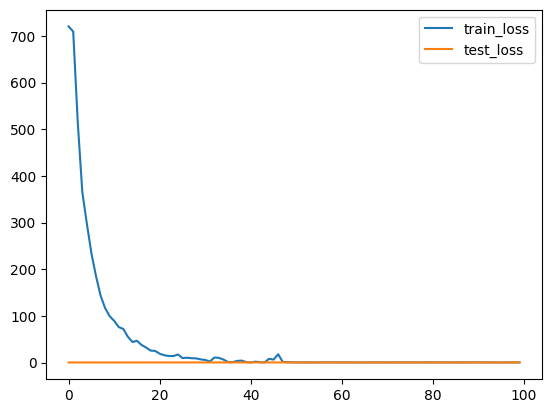

In [11]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])